In [1]:
import tensorflow as tf
import numpy as np

2023-11-15 17:28:54.364364: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-15 17:28:54.428958: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-15 17:28:54.430256: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-15 17:28:55.756432: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import tensorflow as tf
#import datetime
import datetime

# Define la ubicación de los logs
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Crea un callback de TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [3]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [4]:
print(celsius)

[-40. -10.   0.   8.  15.  22.  38.]


In [5]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [6]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error',
    
)

In [7]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=500, verbose=False, callbacks=[tensorboard_callback])
print("Modelo entrenado!")

Comenzando entrenamiento...


Modelo entrenado!


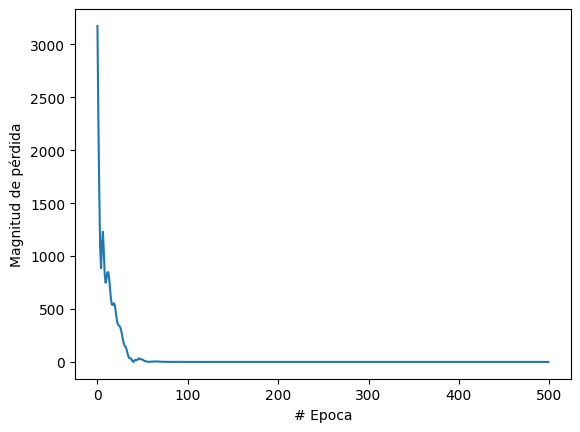

In [8]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [9]:
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 [==============================] - 0s 115ms/step
El resultado es [[211.74742]] fahrenheit!


In [22]:
print("Variables internas del modelo")
#print(capa.get_weights())
d1=oculta1.get_weights()
print(d1)
#print(oculta2.get_weights())
#print(salida.get_weights())

Variables internas del modelo
[array([[-0.03868045,  0.885239  , -0.02961625]], dtype=float32), array([ 3.348463 ,  3.9355376, -1.746234 ], dtype=float32)]


In [11]:
from tensorflow.keras.utils import plot_model

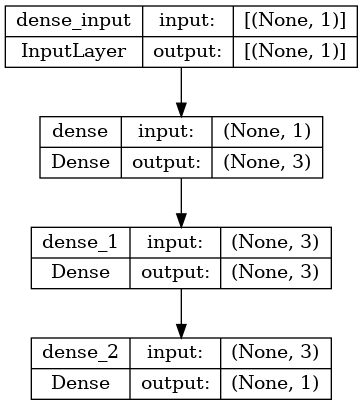

In [12]:
plot_model(modelo, to_file='model_plot.png', show_shapes=True, show_layer_names=True)